# Exercises 🛠

## 0. Prerequisites

In [22]:
# import libraries
import random
import itertools
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix

## 1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10 minutes. Especially try different learning values, what happens when you decrease it? What happens when you increase it?

The default learning rate set by the website is 0.03.

With an increased learning rate it converges quickly, however, when you increase the learning rate above 0.3 (e.g. 1, 3, 10) the gradient explodes and either doesn't converge at all (result leans towards one class only) or converges after long epochs but performs worse.

With a decreased learning rate it converges slowly, but, with a low learning rate (e.g. 0.00001) it would either take forever to converge or it won't converge since the loss decreases by 0.001 every 1000 epochs.

## 2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary cross entropy loss and accuracy metric. Once it's compiled check a summary of the model. tensorflow playground example neural network

![image0](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

In [2]:
# build a model (6-layered model with 2 dimensional inputs, 6 hidden neurons, and 2 outputs)
model_in_picture = tf.keras.Sequential([
    tf.keras.Input(shape = (2,)),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [3]:
# summary of the model
model_in_picture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (7

## 3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it, and then build a model to fit it at over 85% accuracy.

In [4]:
# load data
X, y = make_moons(n_samples = 100000, noise = 0.03, random_state = 42)

In [5]:
# check the data
X, y

(array([[ 1.07036509, -0.49440852],
        [ 1.30891163, -0.43535977],
        [ 0.35324334,  0.93108726],
        ...,
        [ 1.13769675, -0.47204014],
        [ 0.98439737,  0.06407742],
        [ 0.59252969,  0.87542649]]),
 array([1, 1, 0, ..., 1, 0, 0]))

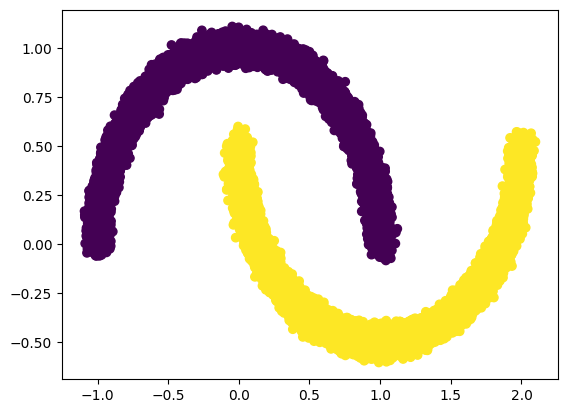

In [6]:
# visualize the data
plt.scatter(X[:, 0], X[:, 1], c = y);

In [7]:
# build a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile a model
model_0.compile(optimizer = 'adam',
                loss = 'BinaryCrossentropy',
                metrics=['accuracy'])

# train a model
model_0.fit(X, y, epochs = 5)

Epoch 1/5
3125/3125 [==============================] - 17s 5ms/step - loss: 0.2153 - accuracy: 0.9032
Epoch 2/5
3125/3125 [==============================] - 7s 2ms/step - loss: 0.0048 - accuracy: 0.9993
Epoch 3/5
3125/3125 [==============================] - 6s 2ms/step - loss: 2.1892e-04 - accuracy: 1.0000
Epoch 4/5
3125/3125 [==============================] - 7s 2ms/step - loss: 3.6308e-05 - accuracy: 1.0000
Epoch 5/5
3125/3125 [==============================] - 6s 2ms/step - loss: 7.1816e-06 - accuracy: 1.0000


## 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [8]:
# load fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [9]:
# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [10]:
# plot pred img function
def plot_images(test_X, test_y, predictions, class_names, num_img):
    plt.figure(figsize = (10, 10))
    for i in range(num_img):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        rand_idx = random.choice(range(len(test_X)))
        plt.imshow(test_X[rand_idx], cmap = plt.cm.binary)
        pred_label = class_names[predictions.argmax(axis = 1)[rand_idx]]
        true_label = class_names[test_y[rand_idx]]
        if pred_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.title(f"Pred: {pred_label:.2f}% True: {true_label}", color = color)

## 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [11]:
# softmax function
def softmax(logits):
    pred_prob = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis = -1, keepdims = True)
    return pred_prob

In [12]:
# testing softmax function
softmax(tf.Variable([-1., 0., 1.]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003058, 0.24472848, 0.66524094], dtype=float32)>

## 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [13]:
# build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_1.compile(optimizer = 'adam',
                loss = 'SparseCategoricalCrossentropy',
                metrics=['accuracy'])

# train a model
model_1.fit(train_X, train_y, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6470 - accuracy: 0.3360
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2630 - accuracy: 0.4504
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1860 - accuracy: 0.4872
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1515 - accuracy: 0.5007
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1265 - accuracy: 0.5111
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1258 - accuracy: 0.5125
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1124 - accuracy: 0.5136
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1068 - accuracy: 0.5208
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1017 - accuracy: 0.5268
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.099

In [14]:
# preprocess data to improve the performance
train_X = train_X / 255.
test_X = test_X / 255.

In [18]:
# build a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile a model
model_2.compile(optimizer = 'adam',
                loss = 'SparseCategoricalCrossentropy',
                metrics=['accuracy'])

# train a model
model_2.fit(train_X, train_y, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5768 - accuracy: 0.7954
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4195 - accuracy: 0.8481
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3847 - accuracy: 0.8588
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8658
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3548 - accuracy: 0.8700
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3409 - accuracy: 0.8737
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3282 - accuracy: 0.8792
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3239 - accuracy: 0.8800
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8827
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.312

In [20]:
# predict test data
y_preds = model_2.predict(test_X)

313/313 [==============================] - 1s 2ms/step


In [21]:
# plot confusion matrix
confusion_matrix(test_y, y_preds.argmax(axis = 1))

array([[812,   3,   8,  41,   0,   3, 121,   0,  12,   0],
       [  1, 970,   2,  20,   3,   0,   3,   0,   1,   0],
       [ 15,   0, 775,  20,  90,   2,  93,   0,   5,   0],
       [ 13,  14,   8, 918,   7,   0,  35,   0,   5,   0],
       [  0,   1, 118,  68, 718,   0,  87,   0,   8,   0],
       [  0,   0,   0,   1,   0, 952,   0,  29,   2,  16],
       [130,   1,  74,  39,  55,   3, 683,   0,  15,   0],
       [  0,   0,   0,   0,   0,  37,   0, 956,   0,   7],
       [  1,   0,   4,   8,   1,   8,   6,   7, 965,   0],
       [  0,   0,   0,   1,   0,   9,   1,  92,   0, 897]])

In [23]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred.argmax(axis = 1))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

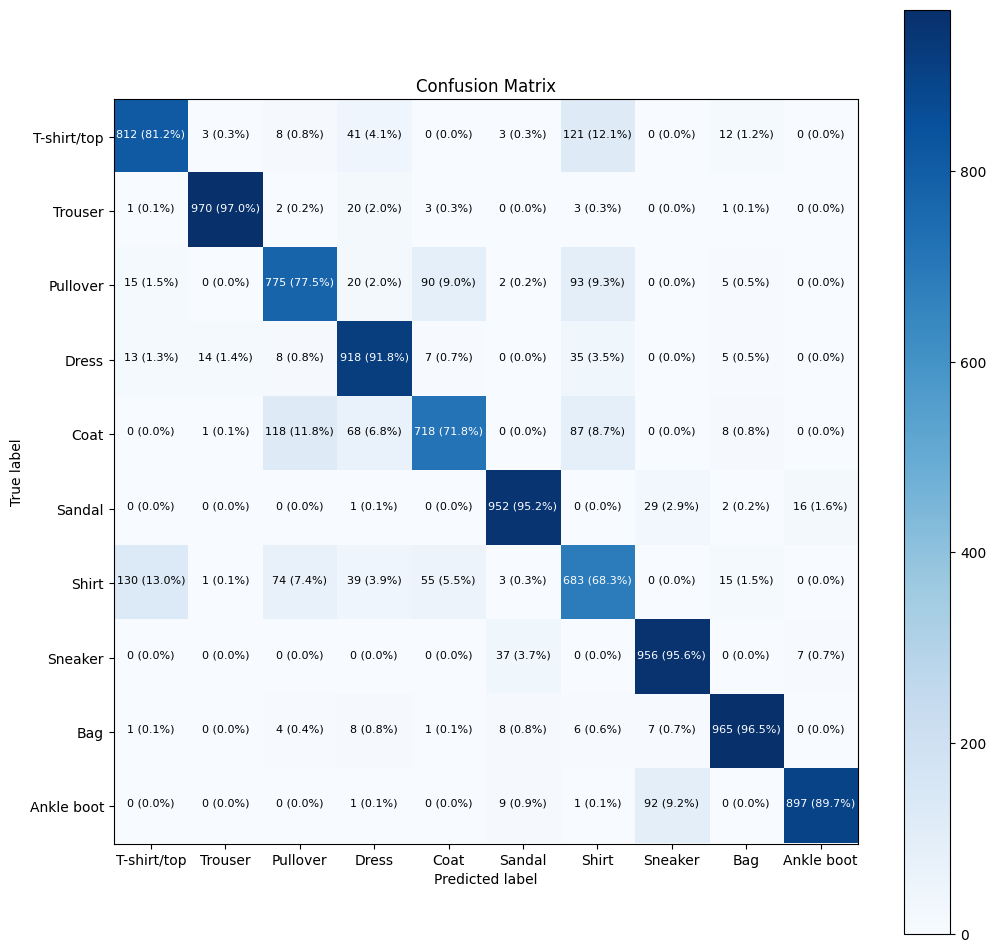

In [27]:
make_confusion_matrix(test_y, y_preds, class_names, figsize=(12, 12), text_size=8)

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.